In [1]:
import pandas as pd
import statsmodels.api as sm

## Exploration


In [3]:
df = pd.read_csv("solar_energy_worldwide.csv")
df

,City,Country,Latitude,Longitude,Annual_Sunlight_Hours,Daily_Peak_Sun_Hours,GHI_kWh_per_m2,Electricity_Price_USD_per_kWh,Solar_Installations_Count,Avg_System_Cost_USD,Avg_Annual_Production_kWh,Estimated_Annual_Savings_USD,Payback_Period_Years,ROI_Percentage,CO2_Reduction_Tons_per_Year,Solar_Viability_Score,Region
0,New York,United States,40.71,-74.01,2500,6.8,4.5,0.15,142000,15000,11250,1687.50,8.9,11.2,4.50,56,North America
1,Los Angeles,United States,34.05,-118.24,3200,8.8,5.8,0.15,142000,15000,14400,2160.00,6.9,14.5,5.76,67,North America
2,Miami,United States,25.76,-80.19,3000,8.2,5.3,0.15,142000,15000,13500,2025.00,7.4,13.5,5.40,63,North America
3,Phoenix,United States,33.45,-112.07,3800,10.4,6.5,0.15,142000,15000,17100,2565.00,5.8,17.2,6.84,73,North America
4,Chicago,United States,41.88,-87.63,2300,6.3,4.2,0.15,142000,15000,10350,1552.50,9.7,10.3,4.14,53,North America
5,Berlin,Germany,52.52,13.40,1650,4.5,3.2,0.15,18500,15000,7425,1113.75,13.5,7.4,2.97,41,Europe
6,Munich,Germany,48.14,11.58,1750,4.8,3.4,0.15,18500,15000,7875,1181.25,12.7,7.9,3.15,43,Europe
7,London,United Kingdom,51.51,-0.13,1500,4.1,2.9,0.15,6500,15000,6750,1012.50,14.8,6.8,2.70,37,Europe
8,Manchester,United Kingdom,53.48,-2.24,1450,4.0,2.8,0.15,6500,15000,6525,978.75,15.3,6.5,2.61,36,Europe
9,Paris,France,48.86,2.35,1750,4.8,3.3,0.15,4200,15000,7875,1181.25,12.7,7.9,3.15,43,Europe


In [9]:
df.shape

(48, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   City                           48 non-null     object 
 1   Country                        48 non-null     object 
 2   Latitude                       48 non-null     float64
 3   Longitude                      48 non-null     float64
 4   Annual_Sunlight_Hours          48 non-null     int64  
 5   Daily_Peak_Sun_Hours           48 non-null     float64
 6   GHI_kWh_per_m2                 48 non-null     float64
 7   Electricity_Price_USD_per_kWh  48 non-null     float64
 8   Solar_Installations_Count      48 non-null     int64  
 9   Avg_System_Cost_USD            48 non-null     int64  
 10  Avg_Annual_Production_kWh      48 non-null     int64  
 11  Estimated_Annual_Savings_USD   48 non-null     float64
 12  Payback_Period_Years           48 non-null     float

### Question:

Is solar energy adoption, as measured by installation counts and production indicators, evenly distributed across sampled countries, or concentrated in a small number of locations?”

In [4]:
country_adoption = (
    df.groupby('Country')['Solar_Installations_Count']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

In [11]:
total_installations = country_adoption['Solar_Installations_Count'].sum()

country_adoption['Share'] = (
    country_adoption['Solar_Installations_Count'] / total_installations
)

country_adoption['Cumulative_Share'] = country_adoption['Share'].cumsum()
country_adoption

,Country,Solar_Installations_Count,Share,Cumulative_Share,Rank
0,China,1218000,0.523075,0.523075,1
1,United States,710000,0.304912,0.827987,2
2,India,219000,0.094050,0.922037,3
3,Germany,37000,0.015890,0.937927,4
4,Australia,26700,0.011466,0.949393,5
5,Japan,24000,0.010307,0.959700,6
6,Italy,14400,0.006184,0.965884,7
7,United Kingdom,13000,0.005583,0.971467,8
8,Spain,11600,0.004982,0.976449,9
9,Brazil,9600,0.004123,0.980572,10


In [7]:
country_adoption['Rank'] = country_adoption.index + 1
country_adoption.head(10)

,Country,Solar_Installations_Count,Share,Cumulative_Share,Rank
0,China,1218000,0.523075,0.523075,1
1,United States,710000,0.304912,0.827987,2
2,India,219000,0.094050,0.922037,3
3,Germany,37000,0.015890,0.937927,4
4,Australia,26700,0.011466,0.949393,5
5,Japan,24000,0.010307,0.959700,6
6,Italy,14400,0.006184,0.965884,7
7,United Kingdom,13000,0.005583,0.971467,8
8,Spain,11600,0.004982,0.976449,9
9,Brazil,9600,0.004123,0.980572,10


Installations do not translate to Output

In [9]:
production_by_country = (
    df.groupby('Country')['Avg_Annual_Production_kWh']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
production_by_country

,Country,Avg_Annual_Production_kWh
0,United States,66600
1,India,37800
2,Australia,36450
3,South Africa,27450
4,Spain,25200
5,China,22050
6,Brazil,20700
7,Italy,20250
8,Canada,17775
9,Japan,17550


Analysis of solar installation counts across the sampled locations shows a highly uneven distribution. A small subset of countries accounts for a disproportionately large share of total solar installations, while most countries contribute relatively few installations. This concentration suggests that, even within a global sample, solar energy adoption is not evenly distributed but instead clustered among a limited number of locations.

# Question 2
Do countries with higher solar potential actually have higher solar adoption?

In [13]:
country_df = (
df.groupby('Country')[[
'Solar_Installations_Count',
'Annual_Sunlight_Hours',
'GHI_kWh_per_m2',
'Avg_Annual_Production_kWh'
]]
.mean()
.reset_index()
)
country_df

,Country,Solar_Installations_Count,Annual_Sunlight_Hours,GHI_kWh_per_m2,Avg_Annual_Production_kWh
0,Argentina,450.0,2500.0,4.800000,11250.0
1,Australia,8900.0,2700.0,5.066667,12150.0
2,Belgium,2100.0,1550.0,3.000000,6975.0
3,Brazil,4800.0,2300.0,4.750000,10350.0
4,Canada,3500.0,1975.0,3.650000,8887.5
5,Chile,1800.0,2800.0,5.500000,12600.0
6,China,609000.0,2450.0,4.550000,11025.0
7,Denmark,1100.0,1700.0,3.100000,7650.0
8,Egypt,650.0,3400.0,6.000000,15300.0
9,France,4200.0,1925.0,3.600000,8662.5


In [14]:
country_df[[
'Solar_Installations_Count',
'Annual_Sunlight_Hours',
'GHI_kWh_per_m2'
]].corr()

,Solar_Installations_Count,Annual_Sunlight_Hours,GHI_kWh_per_m2
Solar_Installations_Count,1.000000,0.075205,0.055549
Annual_Sunlight_Hours,0.075205,1.000000,0.977623
GHI_kWh_per_m2,0.055549,0.977623,1.000000


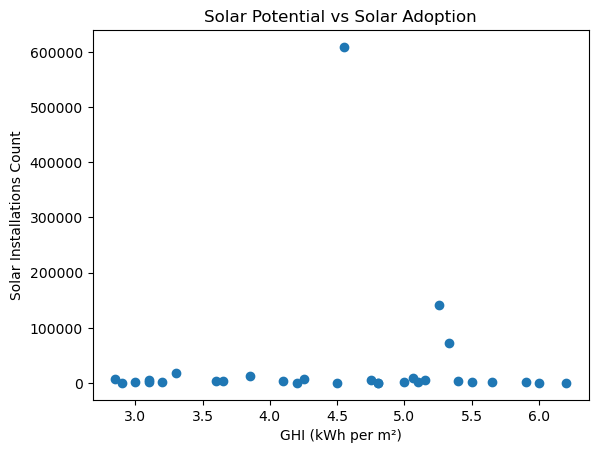

In [15]:
import matplotlib.pyplot as plt


plt.scatter(
country_df['GHI_kWh_per_m2'],
country_df['Solar_Installations_Count']
)
plt.xlabel('GHI (kWh per m²)')
plt.ylabel('Solar Installations Count')
plt.title('Solar Potential vs Solar Adoption')
plt.show()

Solar adoption vs solar potential

Solar Installations ↔ Annual Sunlight Hours: 0.075

Solar Installations ↔ GHI: 0.056

In short countries with more sunlight or higher irradiance are not systematically adopting more solar installations in your sample.